# **Feature Engineering**

## Objectives

* Create new features to improve model predictions.
* Transform and combine existing features.
* Explore the relationships between features and the target variable.

## Inputs

* Cleaned dataset: `outputs/datasets/collection/HousePricesRecords.csv`
* Data with handled missing values and correct data types.

## Outputs

* New dataset with engineered features: `outputs/datasets/feature_engineered/HousePricesFeatures.csv`
* Visualizations (if applicable): Charts showing feature relationships and distributions.


___

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing-Issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing-Issues'

___

## Load data

In [3]:
import pandas as pd
df = pd.read_csv("../jupyter_notebooks/outputs/datasets/collection/HousePricesCleaned.csv")

df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856.0,854.0,3.000000,No,706.0,GLQ,150.0,548.0,RFn,2003.0,...,8450.0,65.0,196.0,61.0,5,7,856.0,2003,2003,208500.0
1,1262.0,0.0,3.000000,Gd,978.0,ALQ,284.0,460.0,RFn,1976.0,...,9600.0,80.0,0.0,0.0,8,6,1262.0,1976,1976,181500.0
2,920.0,866.0,3.000000,Mn,486.0,GLQ,434.0,608.0,RFn,2001.0,...,11250.0,68.0,162.0,42.0,5,7,920.0,2001,2002,223500.0
3,961.0,NaN,2.869214,No,216.0,ALQ,540.0,642.0,Unf,1998.0,...,9550.0,60.0,0.0,35.0,5,7,756.0,1915,1970,140000.0
4,1145.0,NaN,4.000000,Av,655.0,GLQ,490.0,836.0,RFn,2000.0,...,14260.0,84.0,350.0,84.0,5,8,1145.0,2000,2000,250000.0


Fill missing values in 2ndFlrSF with 0 because not all houses have a second floor


In [ ]:
df['2ndFlrSF'].fillna(0, inplace=True)

print("Missing values after filling:")
print(df.isnull().sum())

Missing values after filling:
1stFlrSF        0
2ndFlrSF        0
BedroomAbvGr    0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinType1    0
BsmtUnfSF       0
GarageArea      0
GarageFinish    0
GarageYrBlt     0
GrLivArea       0
KitchenQual     0
LotArea         0
LotFrontage     0
MasVnrArea      0
OpenPorchSF     0
OverallCond     0
OverallQual     0
TotalBsmtSF     0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64


Display summary statistics to understand the distribution of numerical features


In [5]:
df.describe()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,327.994521,2.869214,443.639726,567.240411,472.980137,1978.506164,1515.463699,10516.828082,70.049958,103.685262,46.660274,5.575342,6.099315,1057.429452,1971.267808,1984.865753,180921.195890
std,386.587738,433.576171,0.791802,456.098091,441.866955,213.804841,23.994583,525.480383,9981.264932,22.024023,180.569112,66.256028,1.112799,1.382997,438.705324,30.202904,20.645407,79442.502883
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,334.000000,1300.000000,21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1872.000000,1950.000000,34900.000000
25%,882.000000,0.000000,2.000000,0.000000,223.000000,334.500000,1962.000000,1129.500000,7553.500000,60.000000,0.000000,0.000000,5.000000,5.000000,795.750000,1954.000000,1967.000000,129975.000000
50%,1087.000000,0.000000,3.000000,383.500000,477.500000,480.000000,1978.506164,1464.000000,9478.500000,70.049958,0.000000,25.000000,5.000000,6.000000,991.500000,1973.000000,1994.000000,163000.000000
75%,1391.250000,714.500000,3.000000,712.250000,808.000000,576.000000,2001.000000,1776.750000,11601.500000,79.000000,164.250000,68.000000,6.000000,7.000000,1298.250000,2000.000000,2004.000000,214000.000000
max,4692.000000,2065.000000,8.000000,5644.000000,2336.000000,1418.000000,2010.000000,5642.000000,215245.000000,313.000000,1600.000000,547.000000,9.000000,10.000000,6110.000000,2010.000000,2010.000000,755000.000000


Visualize the distribution of 2ndFlrSF to see how many houses have a second floor and its size


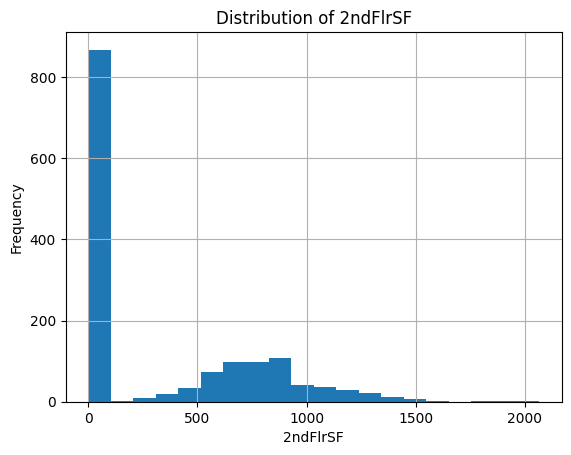

In [7]:
import matplotlib.pyplot as plt
df['2ndFlrSF'].hist(bins=20)
plt.title('Distribution of 2ndFlrSF')
plt.xlabel('2ndFlrSF')
plt.ylabel('Frequency')
plt.show()


In [4]:
from sklearn.preprocessing import StandardScaler
from feature_engine.selection import SmartCorrelatedSelection
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import pandas as pd

# Define a custom encoder for categorical variables
class MyCustomEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, variables, mapping):
        self.variables = variables
        self.mapping = mapping

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for feature in self.variables:
            if feature in X.columns:
                X[feature] = X[feature].map(self.mapping.get(feature, {}))
        return X

# Mapping for categorical variables
mapping = {
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0},
    'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0},
    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0},
    'KitchenQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
}

# Categorical and numerical columns
categorical_columns = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']
numerical_columns = ['2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'GarageArea', 'LotArea', 'OverallCond', 'OverallQual']

# Define the pipeline
pipeline = Pipeline([
    # Encode categorical variables
    ('custom_encoder', MyCustomEncoder(variables=categorical_columns, mapping=mapping)),
    # Scale numerical features
    ('scaler', StandardScaler()),
    # Automatically drop highly correlated features
    ('corr_selector', SmartCorrelatedSelection(method="spearman", threshold=0.8, selection_method="variance"))
])

# Remove the target variable and apply the pipeline
X = df.drop(columns=['SalePrice'], errors='ignore')
y = df['SalePrice']

# Fit and transform the pipeline
X_transformed = pipeline.fit_transform(X)

# Get the remaining columns by excluding dropped features
features_to_drop = pipeline.named_steps['corr_selector'].features_to_drop_
remaining_columns = [col for col in X.columns if col not in features_to_drop]

# Combine the transformed data into a DataFrame
df_transformed = pd.DataFrame(X_transformed, columns=remaining_columns)

# Add the target variable back to the DataFrame
df_transformed['SalePrice'] = y

# Display results
print("Final dataset shape:", df_transformed.shape)
print("Columns in final dataset:", df_transformed.columns.tolist())


Final dataset shape: (1460, 24)
Columns in final dataset: ['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'GarageFinish', 'GarageYrBlt', 'GrLivArea', 'KitchenQual', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'SalePrice']


In [5]:
print("DataFrame shape after operation:", df.shape)
print("DataFrame columns after operation:", df.columns.tolist())


DataFrame shape after operation: (1460, 24)
DataFrame columns after operation: ['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'GarageFinish', 'GarageYrBlt', 'GrLivArea', 'KitchenQual', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'SalePrice']


Show correlation matrix for numeric features

In [6]:
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()


Create a heatmap to visualize the correlation matrix

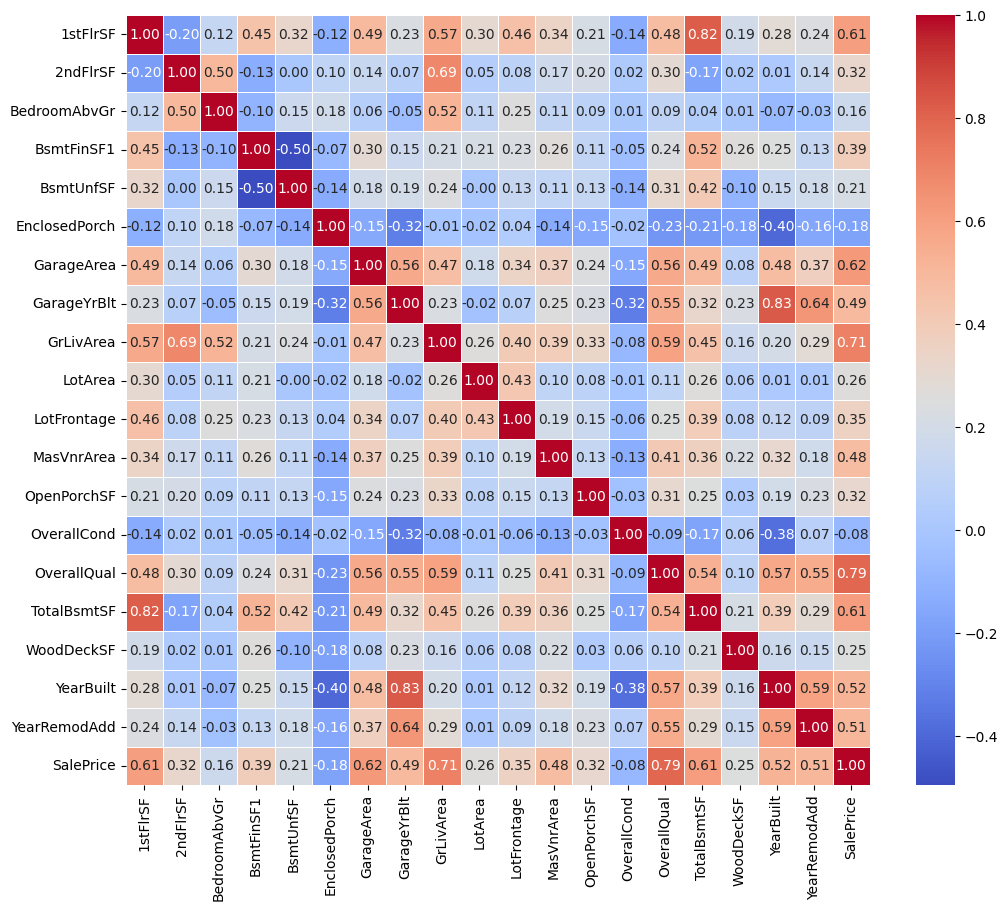

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()


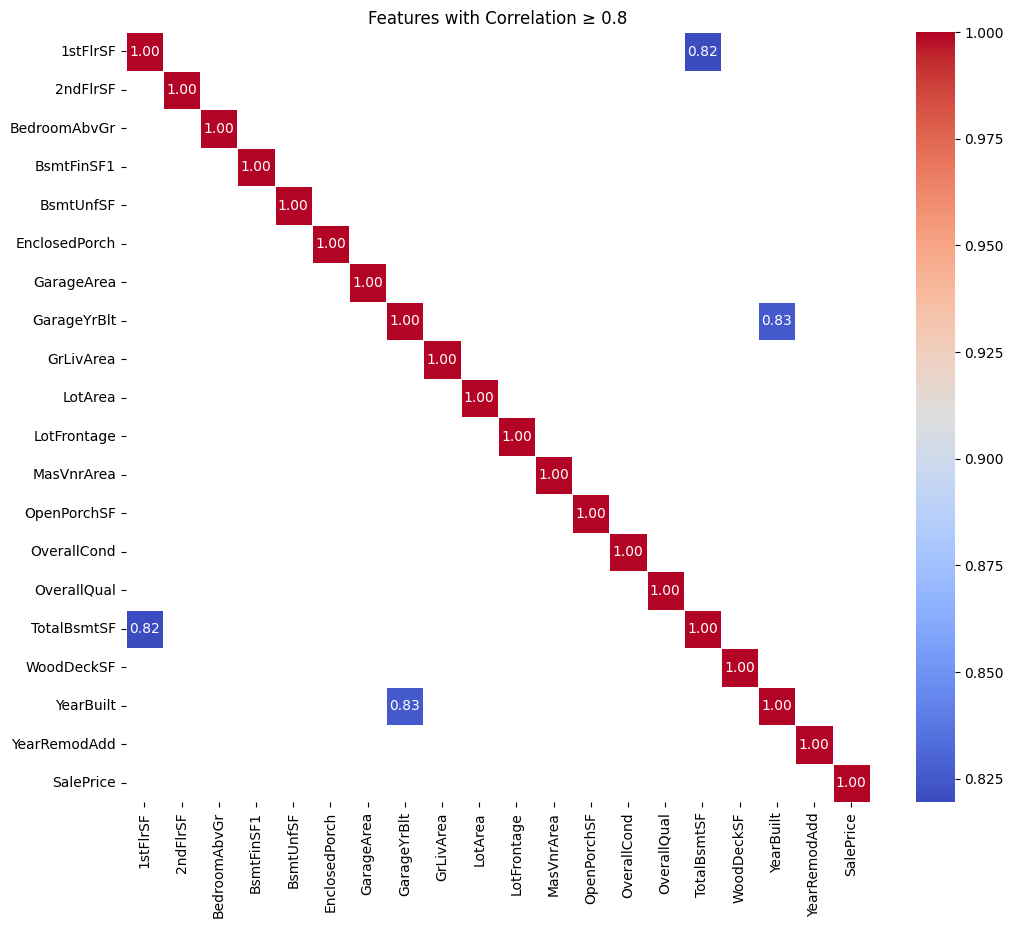

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Threshold for high correlation
threshold = 0.8

# Filter correlation matrix to keep values >= 0.8
high_correlation = correlation_matrix.applymap(lambda x: x if x >= threshold else np.nan)

# Plot the filtered correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(high_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Features with Correlation ≥ 0.8")
plt.show()


Scale numerical features to standardize their values

In [9]:
from sklearn.preprocessing import StandardScaler
from feature_engine.selection import SmartCorrelatedSelection

# Define columns to scale (remove 'GrLivArea' as it was already dropped)
expected_columns = ['2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'GarageArea']

# Ensure the expected columns exist in the DataFrame
missing_columns = [col for col in expected_columns if col not in df.columns]
if missing_columns:
    raise KeyError(f"The following columns are missing from the DataFrame: {missing_columns}")

# Scale numerical features
scaler = StandardScaler()
df[expected_columns] = scaler.fit_transform(df[expected_columns])
print("Scaled columns successfully!")

# SmartCorrelatedSelection
corr_selector = SmartCorrelatedSelection(method="spearman", threshold=0.8, selection_method="variance")

# Remove the target variable from the dataset
X = df.drop(columns=['SalePrice'])

# Apply SmartCorrelatedSelection to the dataset
X_transformed = corr_selector.fit_transform(X)

# Update the dataset
df = X_transformed.copy()
df['SalePrice'] = df['SalePrice'] if 'SalePrice' in df else None  # Add the target variable back

# Display results
print("Remaining columns after SmartCorrelatedSelection:")
print(df.columns.tolist())
print("Removed features:", corr_selector.features_to_drop_)
print("Correlated feature groups:", corr_selector.correlated_feature_sets_)




Scaled columns successfully!
Remaining columns after SmartCorrelatedSelection:
['2ndFlrSF', 'BedroomAbvGr', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'GarageFinish', 'GrLivArea', 'KitchenQual', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'SalePrice']
Removed features: ['1stFlrSF', 'GarageYrBlt']
Correlated feature groups: [{'TotalBsmtSF', '1stFlrSF'}, {'GarageYrBlt', 'YearBuilt'}]


Show datatypes

In [10]:
print(df.dtypes)


2ndFlrSF         float64
BedroomAbvGr     float64
BsmtExposure      object
BsmtFinSF1       float64
BsmtFinType1      object
BsmtUnfSF        float64
EnclosedPorch    float64
GarageArea       float64
GarageFinish      object
GrLivArea        float64
KitchenQual       object
LotArea          float64
LotFrontage      float64
MasVnrArea       float64
OpenPorchSF      float64
OverallCond        int64
OverallQual        int64
TotalBsmtSF      float64
WoodDeckSF       float64
YearBuilt          int64
YearRemodAdd       int64
SalePrice         object
dtype: object


Print the number of unique values in each column

In [11]:
print(df.nunique())


2ndFlrSF          401
BedroomAbvGr        8
BsmtExposure        4
BsmtFinSF1        637
BsmtFinType1        6
BsmtUnfSF         780
EnclosedPorch      19
GarageArea        441
GarageFinish        3
GrLivArea         861
KitchenQual         4
LotArea          1073
LotFrontage       110
MasVnrArea        327
OpenPorchSF       202
OverallCond         9
OverallQual        10
TotalBsmtSF       721
WoodDeckSF         58
YearBuilt         112
YearRemodAdd       61
SalePrice           0
dtype: int64


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from feature_engine.selection import SmartCorrelatedSelection

#  Define the pipeline
pipeline = Pipeline([
    # Scaling numerical features
    ('scaler', StandardScaler()),

    # Automatically handle correlations using SmartCorrelatedSelection
    ('correlation_selector', SmartCorrelatedSelection(
        method="spearman",
        threshold=0.8,
        selection_method="variance"
    ))
])

# Define numerical columns to scale
numerical_columns = ['2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'GarageArea', 'GrLivArea']

# Filter columns to ensure they exist in the current dataset
columns_to_scale = [col for col in numerical_columns if col in df.columns]

# Exclude the target variable (SalePrice) and apply the pipeline
X = df[columns_to_scale]
X_transformed = pipeline.fit_transform(X)

# Recreate the DataFrame with processed numerical features
df_transformed = pd.DataFrame(X_transformed, columns=columns_to_scale)

# Add the target variable back to the transformed DataFrame
df_transformed['SalePrice'] = df['SalePrice']

# Display results
print(f"Pipeline completed: {df_transformed.columns.tolist()}")



Pipeline completed: ['2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'GarageArea', 'GrLivArea', 'SalePrice']


Split data into training and test sets (70% training, 30% test)

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (1022, 21), Test set: (438, 21)


___

## Push files to repo

In [15]:
print("Missing values after pipeline:")
print(df_transformed.isnull().sum())

df_transformed.to_csv("../jupyter_notebooks/outputs/datasets/collection/HousePricesFeatures.csv", index=False)
print("Exported the transformed dataset successfully!")


Missing values after pipeline:
2ndFlrSF        1460
BedroomAbvGr    1460
BsmtFinSF1      1460
GarageArea      1460
GrLivArea       1460
SalePrice       1460
dtype: int64
Exported the transformed dataset successfully!
